In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
cols=['Recency','Freq','Amount','Time','Class']

dataset = pd.read_csv('transfusion.csv',names=cols,skiprows=1)

dataset.head()

,Recency,Freq,Amount,Time,Class
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [2]:
dataset.describe()

,Recency,Freq,Amount,Time,Class
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
Recency    748 non-null int64
Freq       748 non-null int64
Amount     748 non-null int64
Time       748 non-null int64
Class      748 non-null int64
dtypes: int64(5)
memory usage: 29.3 KB


In [4]:
print(dataset['Amount'].min())
print(dataset['Freq'].min())
#dataset['Amount'] -= dataset['Amount'].min()
#dataset['Amount'] /= dataset['Amount'].max()

##dataset['Freq'] -= dataset['Freq'].min()
#dataset['Freq'] /= dataset['Freq'].max()

#dataset['Time'] -= dataset['Time'].min()
#dataset['Time'] /= dataset['Time'].max()
#dataset.head()

250
1


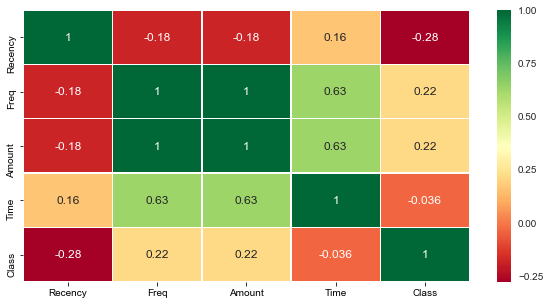

In [5]:
corrmat = dataset.corr()
plt.figure()
plt.subplots(figsize=(10,5))
sns.set(font_scale=1)
sns.heatmap(corrmat,cmap='RdYlGn',linewidths=0.5,annot=True)
plt.show()

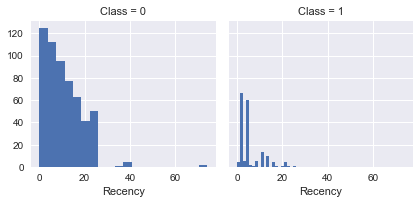

In [6]:
g = sns.FacetGrid(dataset,col='Class')
g.map(plt.hist,'Recency',bins=20)

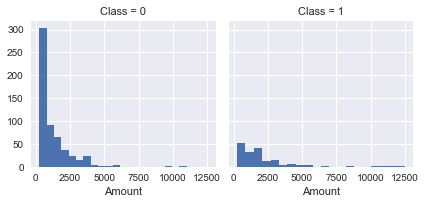

In [7]:
g = sns.FacetGrid(dataset,col='Class')
g.map(plt.hist,'Amount',bins=20)

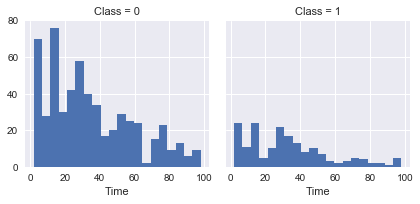

In [8]:
g = sns.FacetGrid(dataset,col='Class')
g.map(plt.hist,'Time',bins=20)

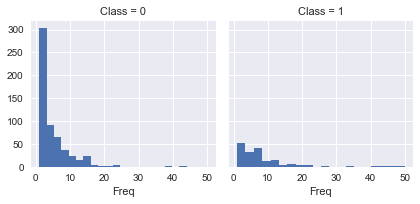

In [9]:
g = sns.FacetGrid(dataset,col='Class')
g.map(plt.hist,'Freq',bins=20)

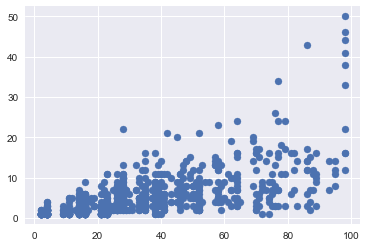

In [10]:
x = dataset['Time']
y = dataset['Freq']

plt.scatter(x,y)
plt.show()

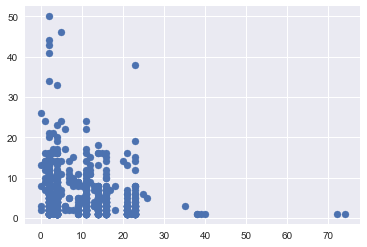

In [11]:
x = dataset['Recency']
y = dataset['Freq']

plt.scatter(x,y)
plt.show()

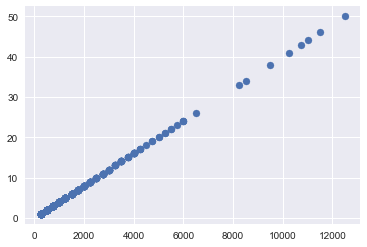

In [12]:
x = dataset['Amount']
y = dataset['Freq']

plt.scatter(x,y)
plt.show()

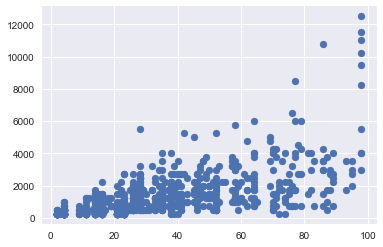

In [13]:
x = dataset['Time']
y = dataset['Amount']

plt.scatter(x,y)
plt.show()

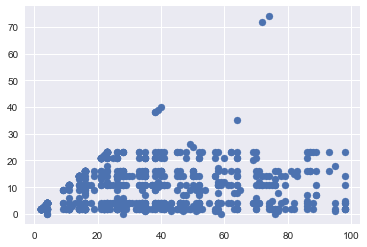

In [14]:
x = dataset['Time']
y = dataset['Recency']

plt.scatter(x,y)
plt.show()

In [15]:
#dataset = dataset.drop(['Amount'],axis=1)
dataset.head()

,Recency,Freq,Amount,Time,Class
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

cols_to_x = ['Recency','Freq','Time','Amount']
X = dataset[cols_to_x]
y = dataset['Class']

X_train,X_test,y_train,y_test =  train_test_split(X, y,test_size=0.27, random_state=0)

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
prediction = knn.predict(X_test)

accuracy_score(y_test,prediction,normalize=True)

#from sklearn.neighbors import NearestNeighbors
#neigh = NearestNeighbors(n_neighbors=3)
#neigh.fit(X_train,y_train) 

#prediction = neigh.kneighbors(X_test)
#accuracy_score(y_test,prediction,normalize=True)

0.65841584158415845